In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
d11=pd.read_csv('diabetes.csv')

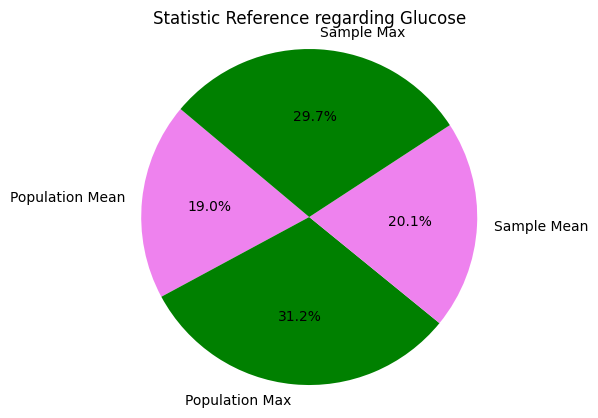

In [16]:
np.random.seed(520)
sample = d11.sample(25)
population_mean = d11['Glucose'].mean()
population_max = d11['Glucose'].max()
sample_mean = sample['Glucose'].mean()
sample_max = sample['Glucose'].max()
labels = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
sizes = [population_mean, population_max, sample_mean, sample_max]
colors = ['violet', 'green', 'violet', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Statistic Reference regarding Glucose')
plt.show()


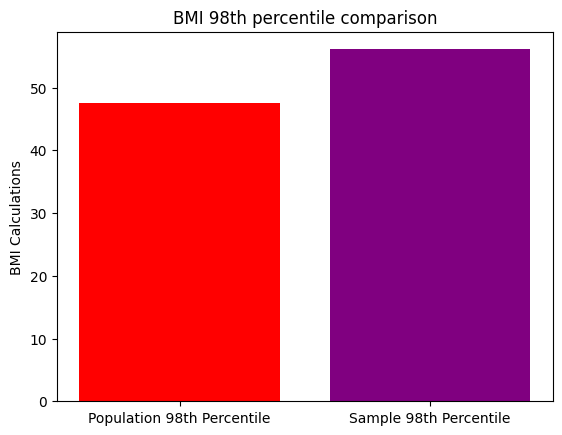

In [17]:
population_percent = np.percentile(d11['BMI'], 98)
sample_percent = np.percentile(sample['BMI'], 98)

name_label = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percent, sample_percent]
plt.bar(name_label, values, color=['red', 'purple'])
plt.title('BMI 98th percentile comparison')
plt.ylabel('BMI Calculations')
plt.show()

In [20]:
bootstrap_samples = 500
sample_size = 150

bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_std_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)

for i in range(bootstrap_samples):
    bootstrap_sample = d11['BloodPressure'].sample(sample_size, replace=True)
    bootstrap_means[i] = bootstrap_sample.mean()
    bootstrap_std_devs[i] = bootstrap_sample.std()
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 98)

population_mean = d11['BloodPressure'].mean()
population_std_dev = d11['BloodPressure'].std()
population_percentile = np.percentile(d11['BloodPressure'], 98)

bmean=np.mean(bootstrap_means)
bsd=np.mean(bootstrap_std_devs)
bp=np.mean(bootstrap_percentiles)

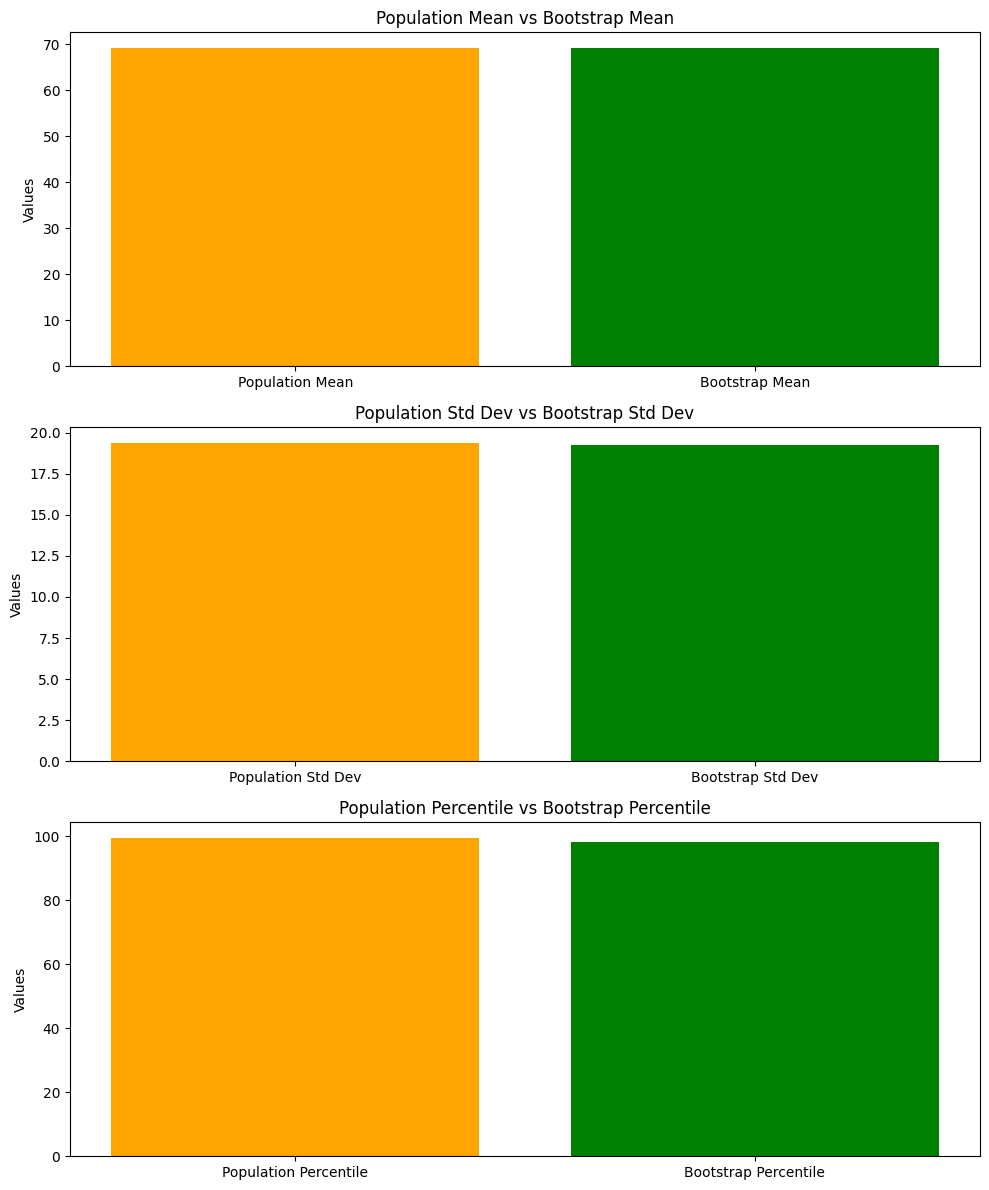

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bmean], color=['orange', 'green'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [population_std_dev, bsd], color=['orange', 'green'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axs[2].bar(['Population Percentile', 'Bootstrap Percentile'], [population_percentile, bp], color=['orange', 'green'])
axs[2].set_ylabel('Values')
axs[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()